In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
os.chdir("../..")


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray


In [4]:
from qml.model.gate import get_gateset
from qml.model.model import Model
from qml.model.unit import Unit, EmbedUnit
from qml.tools.evaluator import Evaluator
from qml.tools.dataset import generate_dataset


In [15]:
from qml.tools.pattern import ErrorPattern, ErrorPatternEvaluator
from qml.tools.wavelet import WaveletTransform, Haar


## Parameter

In [6]:
# circuit
num_qubits = nq = 2
num_gate_per_unit = ng = 3
num_unit_per_round = nu = 9

# dataset
dim_input = nx = 1
dim_output = ny = 1
num_train_data = 20
num_test_data = 20
gateset = get_gateset(nq)

# optimization
shots = 50
num_max_iter = 100
var_to_explore = 0.3


## Dataset

In [7]:
target_func = lambda x: np.sin(np.pi * x)


In [8]:
train_data = generate_dataset(num_train_data, target_func)
test_data  = generate_dataset(num_test_data,  target_func)


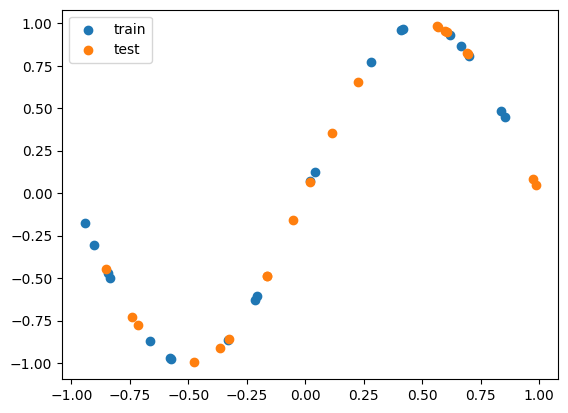

In [9]:
fig, ax = plt.subplots()
ax.scatter(*train_data.data, label="train")
ax.scatter(*test_data.data, label="test")
plt.legend()


In [10]:
emb_unit = EmbedUnit.generate_ry_arcsin_embed_unit("emb", nq, nx, gateset)


In [11]:
model = Model(nq, ny, emb_unit, [], [])


In [17]:
evaluator = ErrorPatternEvaluator(train_data.xs, train_data.ys, model, shots=shots)


In [18]:
ep = evaluator()


(<Figure size 640x480 with 1 Axes>, <Axes: >)

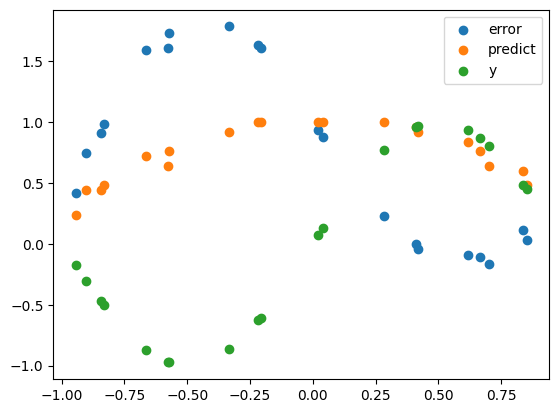

In [19]:
ep.draw_pattern(show_predict=True, show_y=True)


## Transform

In [72]:
wavelet = Haar()
wtrans = WaveletTransform(wavelet)


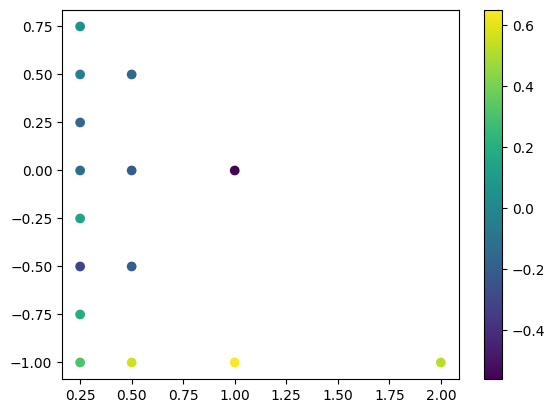

In [93]:
dim = 4
wpowers4 = wtrans.transform(ep.xs, ep.es, dim=dim)
wpatterns = wtrans.generate_wavelet_params(dim)
wpattern_xs = wpatterns[:, 0]
wpattern_ys = wpatterns[:, 1]

# print("Powers:", wpowers)
plt.scatter(wpattern_xs, wpattern_ys, c=wpowers4)
plt.colorbar()


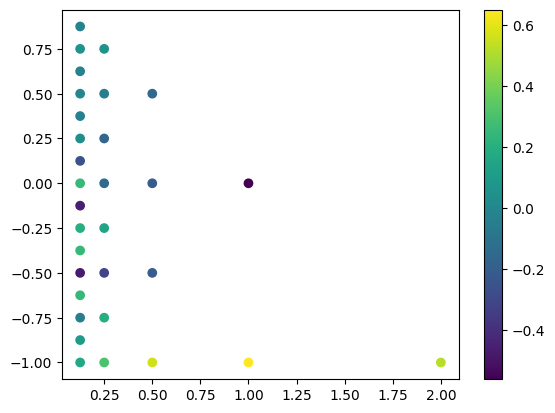

In [94]:
dim = 5
wpowers5 = wtrans.transform(ep.xs, ep.es, dim=dim)
wpatterns = wtrans.generate_wavelet_params(dim)
wpattern_xs = wpatterns[:, 0]
wpattern_ys = wpatterns[:, 1]

plt.scatter(wpattern_xs, wpattern_ys, c=wpowers5)
plt.colorbar()


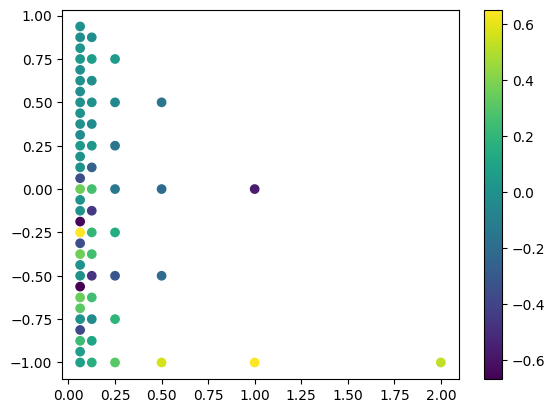

In [95]:
dim = 6
wpowers6 = wtrans.transform(ep.xs, ep.es, dim=dim)
wpatterns = wtrans.generate_wavelet_params(dim)
wpattern_xs = wpatterns[:, 0]
wpattern_ys = wpatterns[:, 1]

plt.scatter(wpattern_xs, wpattern_ys, c=wpowers6)
plt.colorbar()


(0.0, 63.0)

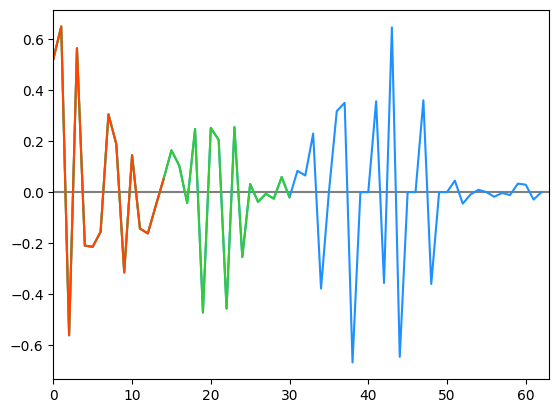

In [96]:
plt.hlines(0, 0, len(wpowers6), colors="gray")
plt.plot(wpowers6, c="dodgerblue")
plt.plot(wpowers5, c="limegreen")
plt.plot(wpowers4, c="orangered")
plt.xlim(0, len(wpowers6))


In [59]:
wavelet.get_wavelet_range((2, -1))


[-1, 1]

In [64]:
(train_data.xs + 1) / 1 


array([1.70136643, 0.78375821, 1.02201254, 1.41721381, 1.04047347,
       0.66770548, 0.42758934, 0.79240013, 1.66542387, 0.05678146,
       0.15682096, 1.83855912, 0.16683668, 0.09820614, 1.28184813,
       0.33666366, 1.61919198, 0.42310909, 1.85205016, 1.40892929])

In [66]:
wavelet.get_pattern_applied_func(1, -1, np.linspace(-1, 1, 21)) / np.sqrt(1)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])